In [1]:
# python
from tqdm.notebook import tqdm
import sys
import os
import importlib
# columnar analysis
import awkward as ak
import mplhep as hep
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
def structure(vari, cha1, cha2):
    print("4mu {0} structure: {1}".format(vari, cha1))
    print("2mu2e {0} structure: {1}".format(vari, cha2))
    
    return vari

In [2]:
samples_2mu2e = [
    '2mu2e_500GeV_5GeV_0p08mm',
    '2mu2e_500GeV_5GeV_0p8mm',
    '2mu2e_500GeV_5GeV_8p0mm',
    '2mu2e_500GeV_5GeV_40p0mm',
    '2mu2e_500GeV_5GeV_80p0mm',
]

samples_4mu = [
    '4mu_500GeV_5GeV_0p08mm',
    '4mu_500GeV_5GeV_0p8mm',
    '4mu_500GeV_5GeV_8p0mm',
    '4mu_500GeV_5GeV_40p0mm',
    '4mu_500GeV_5GeV_80p0mm',
]

In [3]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v2_merged")
fileset_2mu2e = utilities.make_fileset(samples_2mu2e, "llpNanoAOD_v2_merged")

events_2mu2e, events_4mu = {}, {}

for i in tqdm(samples_2mu2e):
    fname = fileset_2mu2e[i][0]
    print(fname)
    events_2mu2e[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().DSAMuon
    
for i in tqdm(samples_4mu):
    fname = fileset_4mu[i][0]
    print(fname)
    events_4mu[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().DSAMuon

  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/V2/SIDM_BsTo1DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-80p0.root


  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0.root


In [6]:
print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].fields)

['idx', 'pt', 'ptErr', 'eta', 'etaErr', 'phi', 'phiErr', 'charge', 'dxy', 'dz', 'vx', 'vy', 'vz', 'chi2', 'ndof', 'trkNumPlanes', 'trkNumHits', 'trkNumDTHits', 'trkNumCSCHits', 'normChi2', 'outerEta', 'outerPhi', 'dzPV', 'dzPVErr', 'dxyPVTraj', 'dxyPVTrajErr', 'dxyPVSigned', 'dxyPVSignedErr', 'ip3DPVSigned', 'ip3DPVSignedErr', 'dxyBS', 'dxyBSErr', 'dzBS', 'dzBSErr', 'dxyBSTraj', 'dxyBSTrajErr', 'dxyBSSigned', 'dxyBSSignedErr', 'ip3DBSSigned', 'ip3DBSSignedErr', 'displacedID', 'muonMatch1', 'muonMatch1idx', 'muonMatch2', 'muonMatch2idx', 'muonMatch3', 'muonMatch3idx', 'muonMatch4', 'muonMatch4idx', 'muonMatch5', 'muonMatch5idx', 'muonDTMatch1', 'muonDTMatch1idx', 'muonDTMatch2', 'muonDTMatch2idx', 'muonDTMatch3', 'muonDTMatch3idx', 'muonCSCMatch1', 'muonCSCMatch1idx', 'muonCSCMatch2', 'muonCSCMatch2idx', 'muonCSCMatch3', 'muonCSCMatch3idx', 'nSegments', 'nDTSegments', 'nCSCSegments']


# Basic Information
## We want basic 4 vector or related variables

## eta

4mu eta structure: [[0.848, 0.624, 0.595], [-2.03, -1.46, ... 0.324], [1.52, 0.0987, 0.0977, -0.913]]
2mu2e eta structure: [[2.35, 2.32, 1.54, -0.513, -0.329], ... -0.989, -0.964], [-1.59, -1.58, -0.448]]
4mu eta structure: [[1.72, -1.27, -1.24, 0.26, 0.321], ... 0.41, 0.141], [0.129, 0.0591, -0.853]]
2mu2e eta structure: [[0.000445], [0.87, -1.81, -1.83, 0.823], ... -0.909, -0.845, 0.53], [0.339, 0.374]]
4mu eta structure: [[-1.88, -1.93, -1.86, -0.702, -1.93, -1.91, ... 2.22, 2.07, 2.18, -0.0134, -0.0679]]
2mu2e eta structure: [[2.4, 0.25], [0.993, 0.932], ... 1.66], [2.01, -1.63, 0.0965, 0.0956, 0.0357]]
4mu eta structure: [[1.71, 0.34, 0.372, -0.455], [-0.9, -0.801, ... 0.466, -0.854], [2.25, 2.27, 2.34]]
2mu2e eta structure: [[-2.37, 0.554, 0.457, -0.991, 0.586], ... [-1.66, -1.71], [-0.246, -0.202]]
4mu eta structure: [[1.07, 0.671, 1.12], [2.06, 2.28, 1.85, ... -0.653], [1.83, 1.11, 1.15, -1.41]]
2mu2e eta structure: [[2.25, 0.967, 1.03, -0.97, 0.0308], ... 0.817], [-1.06, -1.16

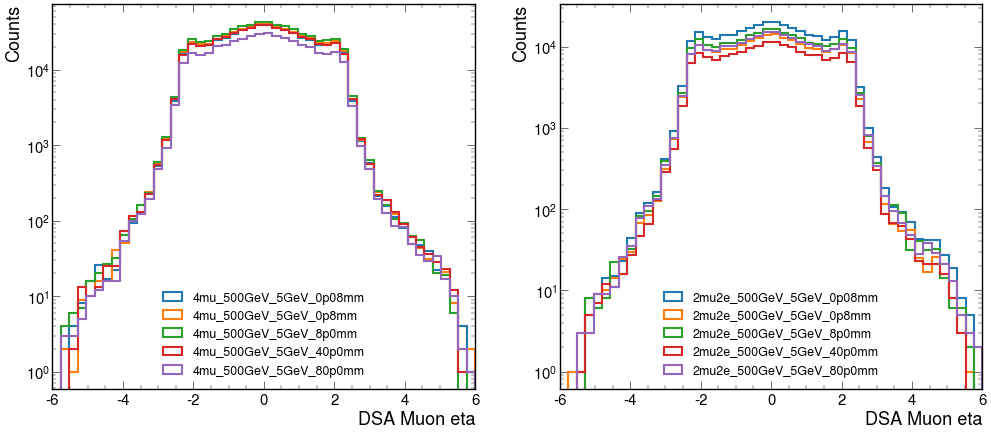

In [6]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("eta", events_4mu[i_4mu].eta, events_2mu2e[i_2mu].eta)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].eta), range=(-6,6), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].eta), range=(-6,6), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-6,6)
ax[1].set_xlim(-6,6)
ax[0].set_xlabel('DSA Muon eta')
ax[1].set_xlabel('DSA Muon eta')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/DSA_MUON/Basic/eta.png", bbox_inches="tight")

4mu eta structure: [[0.848, 0.624, 0.595], [-2.03, -1.46, ... 0.324], [1.52, 0.0987, 0.0977, -0.913]]
2mu2e eta structure: [[2.35, 2.32, 1.54, -0.513, -0.329], ... -0.989, -0.964], [-1.59, -1.58, -0.448]]
4mu eta structure: [[1.72, -1.27, -1.24, 0.26, 0.321], ... 0.41, 0.141], [0.129, 0.0591, -0.853]]
2mu2e eta structure: [[0.000445], [0.87, -1.81, -1.83, 0.823], ... -0.909, -0.845, 0.53], [0.339, 0.374]]
4mu eta structure: [[-1.88, -1.93, -1.86, -0.702, -1.93, -1.91, ... 2.22, 2.07, 2.18, -0.0134, -0.0679]]
2mu2e eta structure: [[2.4, 0.25], [0.993, 0.932], ... 1.66], [2.01, -1.63, 0.0965, 0.0956, 0.0357]]
4mu eta structure: [[1.71, 0.34, 0.372, -0.455], [-0.9, -0.801, ... 0.466, -0.854], [2.25, 2.27, 2.34]]
2mu2e eta structure: [[-2.37, 0.554, 0.457, -0.991, 0.586], ... [-1.66, -1.71], [-0.246, -0.202]]
4mu eta structure: [[1.07, 0.671, 1.12], [2.06, 2.28, 1.85, ... -0.653], [1.83, 1.11, 1.15, -1.41]]
2mu2e eta structure: [[2.25, 0.967, 1.03, -0.97, 0.0308], ... 0.817], [-1.06, -1.16

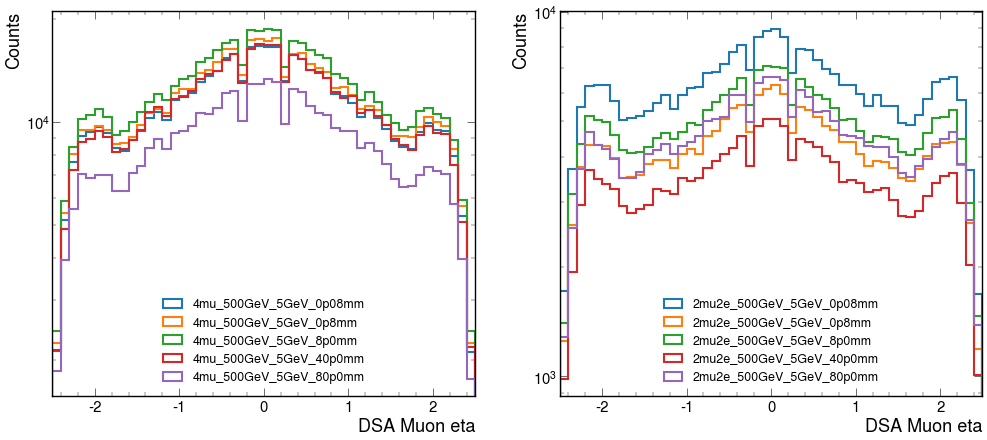

In [9]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("eta", events_4mu[i_4mu].eta, events_2mu2e[i_2mu].eta)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].eta), range=(-2.5,2.5), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].eta), range=(-2.5,2.5), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-2.5,2.5)
ax[1].set_xlim(-2.5,2.5)
ax[0].set_xlabel('DSA Muon eta')
ax[1].set_xlabel('DSA Muon eta')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/DSA_MUON/Basic/eta_low.png", bbox_inches="tight")

4mu eta structure: [[0.848, 0.624, 0.595], [-2.03, -1.46, ... 0.324], [1.52, 0.0987, 0.0977, -0.913]]
2mu2e eta structure: [[2.35, 2.32, 1.54, -0.513, -0.329], ... -0.989, -0.964], [-1.59, -1.58, -0.448]]
4mu eta structure: [[1.72, -1.27, -1.24, 0.26, 0.321], ... 0.41, 0.141], [0.129, 0.0591, -0.853]]
2mu2e eta structure: [[0.000445], [0.87, -1.81, -1.83, 0.823], ... -0.909, -0.845, 0.53], [0.339, 0.374]]
4mu eta structure: [[-1.88, -1.93, -1.86, -0.702, -1.93, -1.91, ... 2.22, 2.07, 2.18, -0.0134, -0.0679]]
2mu2e eta structure: [[2.4, 0.25], [0.993, 0.932], ... 1.66], [2.01, -1.63, 0.0965, 0.0956, 0.0357]]
4mu eta structure: [[1.71, 0.34, 0.372, -0.455], [-0.9, -0.801, ... 0.466, -0.854], [2.25, 2.27, 2.34]]
2mu2e eta structure: [[-2.37, 0.554, 0.457, -0.991, 0.586], ... [-1.66, -1.71], [-0.246, -0.202]]
4mu eta structure: [[1.07, 0.671, 1.12], [2.06, 2.28, 1.85, ... -0.653], [1.83, 1.11, 1.15, -1.41]]
2mu2e eta structure: [[2.25, 0.967, 1.03, -0.97, 0.0308], ... 0.817], [-1.06, -1.16

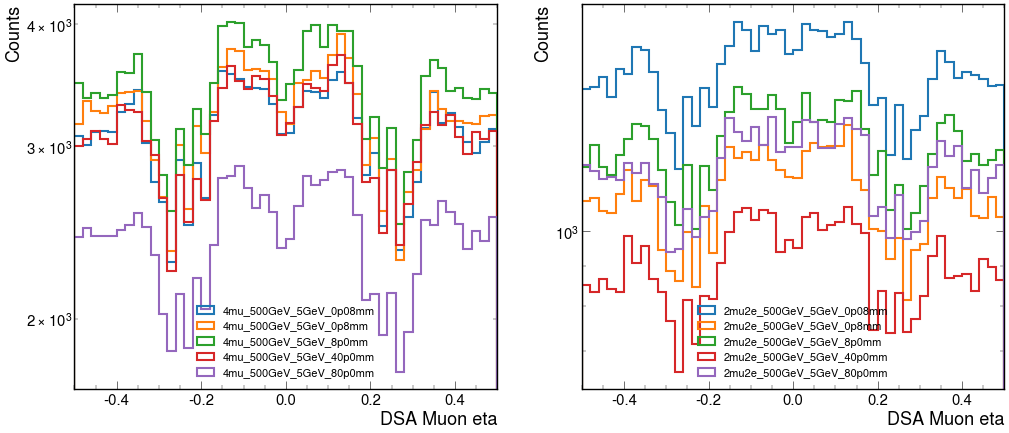

In [6]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("eta", events_4mu[i_4mu].eta, events_2mu2e[i_2mu].eta)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].eta), range=(-0.5,0.5), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].eta), range=(-0.5,0.5), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-0.5,0.5)
ax[1].set_xlim(-0.5,0.5)
ax[0].set_xlabel('DSA Muon eta')
ax[1].set_xlabel('DSA Muon eta')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/DSA_MUON/Basic/eta_superlow.png", bbox_inches="tight")

## phi

4mu phi structure: [[0.21, -2.97, -2.89], [-2.71, 1.2, -0.646, ... -1.59], [-2.88, -1.02, -0.895, 2.28]]
2mu2e phi structure: [[2.28, 2.26, 1.48, -2.58, 0.193], [3.1, ... [1.49, 1.38], [-1.59, -1.52, 1.31]]
4mu phi structure: [[-1.13, -2.63, -2.67, 0.482, 0.491], ... -1.53, -0.916], [-0.567, 1.01, 2.82]]
2mu2e phi structure: [[1.3], [0.451, 1.2, 0.768, 0.329], ... 1.05, 0.422, -0.156, 2.27], [2.49, 2.43]]
4mu phi structure: [[-0.718, -0.717, -0.786, -0.631, 1.69, -0.778, ... 2.8, 2.83, 2.84, 0.553, 0.598]]
2mu2e phi structure: [[-1.58, -1.64], [1.19, 1.59], [2.36, ... 0.694], [2.43, 0.656, 2.32, 2.31, 2.22]]
4mu phi structure: [[2.35, -0.524, -0.474, 1.67], [-2.01, ... 0.848, -1.05], [0.783, 0.827, -2.43]]
2mu2e phi structure: [[0.578, 0.715, -1.91, -2.09, 0.653], [-1.57, ... [2.83, 2.78], [-2.45, -2.5]]
4mu phi structure: [[2.37, -0.873, 2.35], [0.375, 2.86, -2.6, ... 1.91], [-1.73, 1.91, 0.859, -2.9]]
2mu2e phi structure: [[-1.83, -2.12, -2.17, 0.609, 1.86], [1.99, ... 1.81], [2.7, -

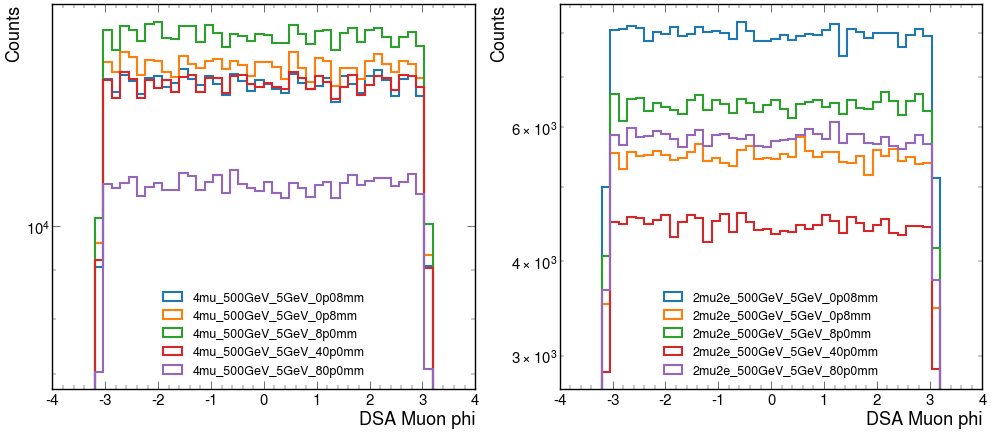

In [9]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("phi", events_4mu[i_4mu].phi, events_2mu2e[i_2mu].phi)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].phi), range=(-4,4), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].phi), range=(-4,4), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

ax[0].set_xlim(-4,4)
ax[1].set_xlim(-4,4)
ax[0].set_xlabel('DSA Muon phi')
ax[1].set_xlabel('DSA Muon phi')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/DSA_MUON/Basic/phi.png", bbox_inches="tight")

## pt

4mu pt structure: [[109, 211, 93], [1.77, 6.87, 11.3, 164, ... 77.8, 2.52], [2.67, 70.4, 16, 12.9]]
2mu2e pt structure: [[12.7, 11.3, 11.5, 3.86, 6.39], [192, 5.72], ... [100, 235], [45.5, 162, 12.9]]
4mu pt structure: [[3.98, 20.1, 99.8, 94.9, 67.8], [11.9, ... 12.5, 12.9, 11.3], [26.6, 7.1, 48.3]]
2mu2e pt structure: [[145], [11.6, 3.54, 2, 6.03], [30.8, ... 2.07, 4.31, 6.29, 933, 6.62], [61.2, 202]]
4mu pt structure: [[80.1, 73.9, 41.8, 2.48, 3.09, 49.1, 3.47, ... [1.26, 12.1, 118, 127, 50.4, 98.3]]
2mu2e pt structure: [[1.94, 200], [8.84, 108], [161, 22.6, ... 25.1, 2.54], [1.93, 2.55, 110, 118, 8.77]]
4mu pt structure: [[22.5, 59.4, 133, 10.8], [10.3, 4.02, 215, ... 5.41, 4.69, 127], [23.4, 24.8, 9.7]]
2mu2e pt structure: [[1.89, 351, 11.2, 7.82, 119], [131, 9.03, ... 7.73], [177, 32.3], [408, 3.84e+03]]
4mu pt structure: [[23.4, 236, 260], [10.7, 2, 2.24, 10.9, ... 11.4, 89.5], [12, 3.59, 8.66, 121]]
2mu2e pt structure: [[5.21, 223, 25.9, 14.4, 3.91], [4.31, ... 95.3, 37.3], [4.4

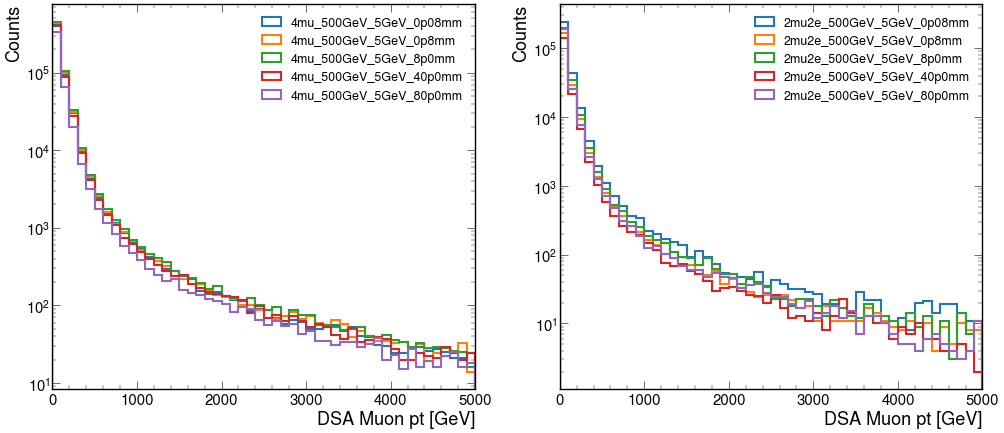

In [22]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("pt", events_4mu[i_4mu].pt, events_2mu2e[i_2mu].pt)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].pt), range=(0,5000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].pt), range=(0,5000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(0,5000)
ax[1].set_xlim(0,5000)
ax[0].set_xlabel('DSA Muon pt [GeV]')
ax[1].set_xlabel('DSA Muon pt [GeV]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/DSA_MUON/Basic/pt.png", bbox_inches="tight")

4mu pt structure: [[109, 211, 93], [1.77, 6.87, 11.3, 164, ... 77.8, 2.52], [2.67, 70.4, 16, 12.9]]
2mu2e pt structure: [[12.7, 11.3, 11.5, 3.86, 6.39], [192, 5.72], ... [100, 235], [45.5, 162, 12.9]]
4mu pt structure: [[3.98, 20.1, 99.8, 94.9, 67.8], [11.9, ... 12.5, 12.9, 11.3], [26.6, 7.1, 48.3]]
2mu2e pt structure: [[145], [11.6, 3.54, 2, 6.03], [30.8, ... 2.07, 4.31, 6.29, 933, 6.62], [61.2, 202]]
4mu pt structure: [[80.1, 73.9, 41.8, 2.48, 3.09, 49.1, 3.47, ... [1.26, 12.1, 118, 127, 50.4, 98.3]]
2mu2e pt structure: [[1.94, 200], [8.84, 108], [161, 22.6, ... 25.1, 2.54], [1.93, 2.55, 110, 118, 8.77]]
4mu pt structure: [[22.5, 59.4, 133, 10.8], [10.3, 4.02, 215, ... 5.41, 4.69, 127], [23.4, 24.8, 9.7]]
2mu2e pt structure: [[1.89, 351, 11.2, 7.82, 119], [131, 9.03, ... 7.73], [177, 32.3], [408, 3.84e+03]]
4mu pt structure: [[23.4, 236, 260], [10.7, 2, 2.24, 10.9, ... 11.4, 89.5], [12, 3.59, 8.66, 121]]
2mu2e pt structure: [[5.21, 223, 25.9, 14.4, 3.91], [4.31, ... 95.3, 37.3], [4.4

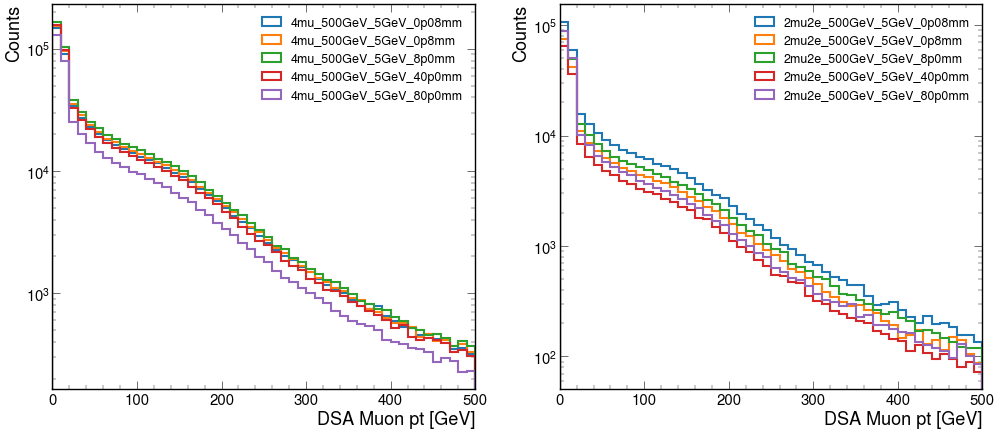

In [7]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("pt", events_4mu[i_4mu].pt, events_2mu2e[i_2mu].pt)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].pt), range=(0,500), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].pt), range=(0,500), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(0,500)
ax[1].set_xlim(0,500)
ax[0].set_xlabel('DSA Muon pt [GeV]')
ax[1].set_xlabel('DSA Muon pt [GeV]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/DSA_MUON/Basic/pt_low.png", bbox_inches="tight")

4mu pt structure: [[109, 211, 93], [1.77, 6.87, 11.3, 164, ... 77.8, 2.52], [2.67, 70.4, 16, 12.9]]
2mu2e pt structure: [[12.7, 11.3, 11.5, 3.86, 6.39], [192, 5.72], ... [100, 235], [45.5, 162, 12.9]]
4mu pt structure: [[3.98, 20.1, 99.8, 94.9, 67.8], [11.9, ... 12.5, 12.9, 11.3], [26.6, 7.1, 48.3]]
2mu2e pt structure: [[145], [11.6, 3.54, 2, 6.03], [30.8, ... 2.07, 4.31, 6.29, 933, 6.62], [61.2, 202]]
4mu pt structure: [[80.1, 73.9, 41.8, 2.48, 3.09, 49.1, 3.47, ... [1.26, 12.1, 118, 127, 50.4, 98.3]]
2mu2e pt structure: [[1.94, 200], [8.84, 108], [161, 22.6, ... 25.1, 2.54], [1.93, 2.55, 110, 118, 8.77]]
4mu pt structure: [[22.5, 59.4, 133, 10.8], [10.3, 4.02, 215, ... 5.41, 4.69, 127], [23.4, 24.8, 9.7]]
2mu2e pt structure: [[1.89, 351, 11.2, 7.82, 119], [131, 9.03, ... 7.73], [177, 32.3], [408, 3.84e+03]]
4mu pt structure: [[23.4, 236, 260], [10.7, 2, 2.24, 10.9, ... 11.4, 89.5], [12, 3.59, 8.66, 121]]
2mu2e pt structure: [[5.21, 223, 25.9, 14.4, 3.91], [4.31, ... 95.3, 37.3], [4.4

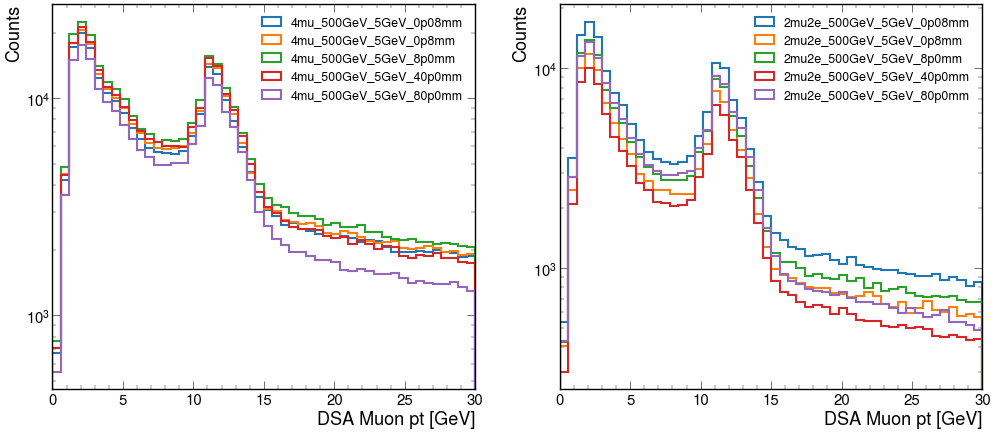

In [28]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("pt", events_4mu[i_4mu].pt, events_2mu2e[i_2mu].pt)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].pt), range=(0,30), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].pt), range=(0,30), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(0,30)
ax[1].set_xlim(0,30)
ax[0].set_xlabel('DSA Muon pt [GeV]')
ax[1].set_xlabel('DSA Muon pt [GeV]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/DSA_MUON/Basic/pt_superlow.png", bbox_inches="tight")

## outerEta

4mu outerEta structure: [[0.849, 0.625, 0.542], [-1.62, -1.47, ... 0.404], [0.968, 0.0825, 0.0331, -0.907]]
2mu2e outerEta structure: [[2.34, 2.37, 1.59, -0.43, -0.32], ... -0.99, -0.964], [-1.59, -1.58, -0.451]]
4mu outerEta structure: [[1.72, -1.28, -1.24, 0.26, 0.32], [-1.8, ... 0.419, 0.138], [0.129, 0.0855, -0.872]]
2mu2e outerEta structure: [[0.000877], [0.889, -2.16, -1.67, 0.83], ... -0.857, -0.862, 0.485], [0.337, 0.37]]
4mu outerEta structure: [[-1.88, -1.93, -1.87, -1.5, -1.95, -1.91, ... 2.17, 2.07, 2.17, -0.00946, -0.069]]
2mu2e outerEta structure: [[2.63, 0.25], [0.97, 0.932], ... 1.68], [1.91, -2.05, 0.0965, 0.0913, 0.105]]
4mu outerEta structure: [[1.72, 0.341, 0.372, -0.451], [-0.914, ... 0.603, -0.854], [2.25, 2.27, 2.36]]
2mu2e outerEta structure: [[-2.55, 0.554, 0.448, -0.99, 0.586], [-0.0183, ... [-1.66, -1.71], [-0.246, -0.201]]
4mu outerEta structure: [[1.08, 0.671, 1.12], [2.14, 2.29, 2.23, ... -0.653], [1.83, 1.14, 1.17, -1.41]]
2mu2e outerEta structure: [[2.2,

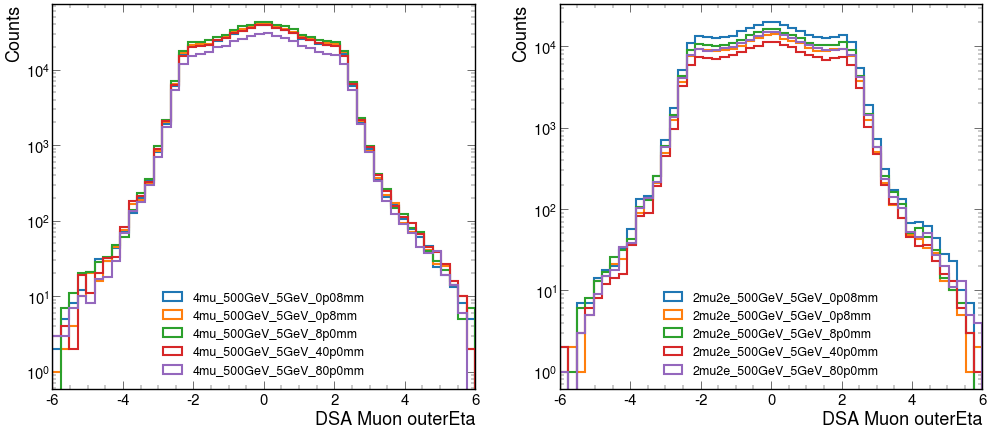

In [29]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("outerEta", events_4mu[i_4mu].outerEta, events_2mu2e[i_2mu].outerEta)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].outerEta), range=(-6,6), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].outerEta), range=(-6,6), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-6,6)
ax[1].set_xlim(-6,6)
ax[0].set_xlabel('DSA Muon outerEta')
ax[1].set_xlabel('DSA Muon outerEta')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/DSA_MUON/Basic/outerEta.png", bbox_inches="tight")

4mu outerEta structure: [[0.849, 0.625, 0.542], [-1.62, -1.47, ... 0.404], [0.968, 0.0825, 0.0331, -0.907]]
2mu2e outerEta structure: [[2.34, 2.37, 1.59, -0.43, -0.32], ... -0.99, -0.964], [-1.59, -1.58, -0.451]]
4mu outerEta structure: [[1.72, -1.28, -1.24, 0.26, 0.32], [-1.8, ... 0.419, 0.138], [0.129, 0.0855, -0.872]]
2mu2e outerEta structure: [[0.000877], [0.889, -2.16, -1.67, 0.83], ... -0.857, -0.862, 0.485], [0.337, 0.37]]
4mu outerEta structure: [[-1.88, -1.93, -1.87, -1.5, -1.95, -1.91, ... 2.17, 2.07, 2.17, -0.00946, -0.069]]
2mu2e outerEta structure: [[2.63, 0.25], [0.97, 0.932], ... 1.68], [1.91, -2.05, 0.0965, 0.0913, 0.105]]
4mu outerEta structure: [[1.72, 0.341, 0.372, -0.451], [-0.914, ... 0.603, -0.854], [2.25, 2.27, 2.36]]
2mu2e outerEta structure: [[-2.55, 0.554, 0.448, -0.99, 0.586], [-0.0183, ... [-1.66, -1.71], [-0.246, -0.201]]
4mu outerEta structure: [[1.08, 0.671, 1.12], [2.14, 2.29, 2.23, ... -0.653], [1.83, 1.14, 1.17, -1.41]]
2mu2e outerEta structure: [[2.2,

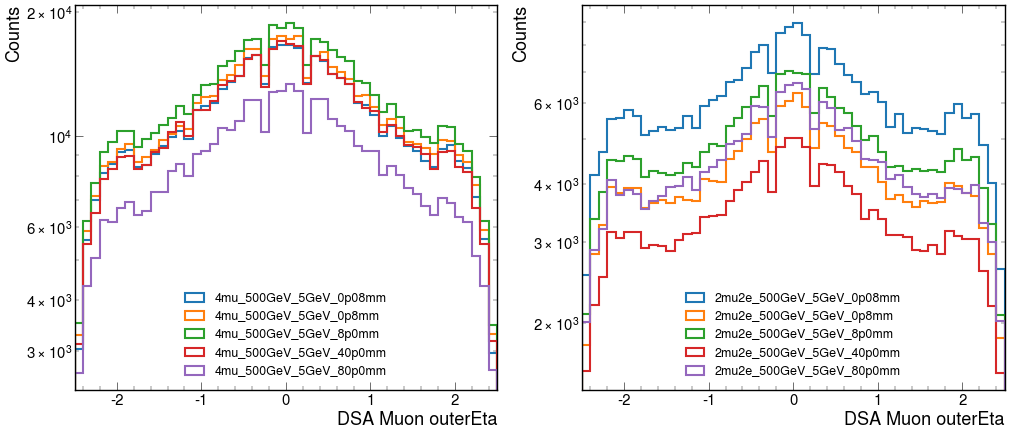

In [30]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("outerEta", events_4mu[i_4mu].outerEta, events_2mu2e[i_2mu].outerEta)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].outerEta), range=(-2.5,2.5), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].outerEta), range=(-2.5,2.5), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-2.5,2.5)
ax[1].set_xlim(-2.5,2.5)
ax[0].set_xlabel('DSA Muon outerEta')
ax[1].set_xlabel('DSA Muon outerEta')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/DSA_MUON/Basic/outerEta_low.png", bbox_inches="tight")

4mu outerEta structure: [[0.849, 0.625, 0.542], [-1.62, -1.47, ... 0.404], [0.968, 0.0825, 0.0331, -0.907]]
2mu2e outerEta structure: [[2.34, 2.37, 1.59, -0.43, -0.32], ... -0.99, -0.964], [-1.59, -1.58, -0.451]]
4mu outerEta structure: [[1.72, -1.28, -1.24, 0.26, 0.32], [-1.8, ... 0.419, 0.138], [0.129, 0.0855, -0.872]]
2mu2e outerEta structure: [[0.000877], [0.889, -2.16, -1.67, 0.83], ... -0.857, -0.862, 0.485], [0.337, 0.37]]
4mu outerEta structure: [[-1.88, -1.93, -1.87, -1.5, -1.95, -1.91, ... 2.17, 2.07, 2.17, -0.00946, -0.069]]
2mu2e outerEta structure: [[2.63, 0.25], [0.97, 0.932], ... 1.68], [1.91, -2.05, 0.0965, 0.0913, 0.105]]
4mu outerEta structure: [[1.72, 0.341, 0.372, -0.451], [-0.914, ... 0.603, -0.854], [2.25, 2.27, 2.36]]
2mu2e outerEta structure: [[-2.55, 0.554, 0.448, -0.99, 0.586], [-0.0183, ... [-1.66, -1.71], [-0.246, -0.201]]
4mu outerEta structure: [[1.08, 0.671, 1.12], [2.14, 2.29, 2.23, ... -0.653], [1.83, 1.14, 1.17, -1.41]]
2mu2e outerEta structure: [[2.2,

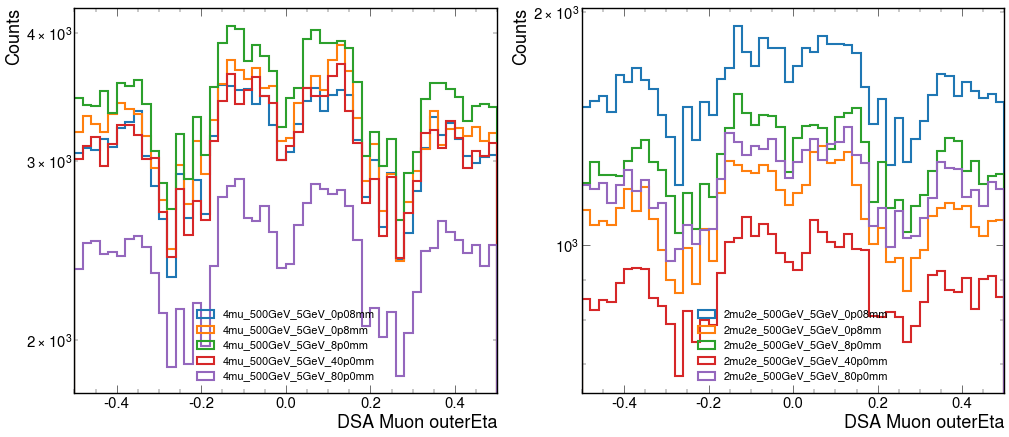

In [ ]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("outerEta", events_4mu[i_4mu].outerEta, events_2mu2e[i_2mu].outerEta)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].outerEta), range=(-0.5,0.5), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].outerEta), range=(-0.5,0.5), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-0.5,0.5)
ax[1].set_xlim(-0.5,0.5)
ax[0].set_xlabel('DSA Muon outerEta')
ax[1].set_xlabel('DSA Muon outerEta')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/DSA_MUON/Basic/outerEta_superlow.png", bbox_inches="tight")

## eta - outerEta

4mu eta - outerEta structure: [[-0.000415, -0.000196, 0.0525], [-0.412, ... [0.552, 0.0162, 0.0646, -0.00666]]
2mu2e eta - outerEta structure: [[0.0123, -0.0407, -0.0473, -0.0829, -0.00973], ... [0.0023, -0.000288, 0.00324]]
4mu eta - outerEta structure: [[-0.00617, 0.00954, -0.000336, 4.8e-06, 0.000565, ... [0.000544, -0.0264, 0.0193]]
2mu2e eta - outerEta structure: [[-0.000432], [-0.0192, 0.352, -0.159, ... 0.0172, 0.0449], [0.00173, 0.00455]]
4mu eta - outerEta structure: [[-0.000376, -0.00308, 0.00859, 0.794, ... -0.000603, 0.0148, -0.00396, 0.00115]]
2mu2e eta - outerEta structure: [[-0.227, 1.9e-05], [0.0233, -7.39e-06, ... 0.1, 0.416, -6.16e-06, 0.00435, -0.0688]]
4mu eta - outerEta structure: [[-0.0102, -0.000959, 0.000506, -0.00398], ... [0.00364, 0.00629, -0.0241]]
2mu2e eta - outerEta structure: [[0.174, -5.14e-05, 0.00963, -0.00042, 0.000265, ... [-0.000153, -0.000177]]
4mu eta - outerEta structure: [[-0.00537, -0.000217, -0.00064], ... [-0.00461, -0.0337, -0.0142, -0.0015

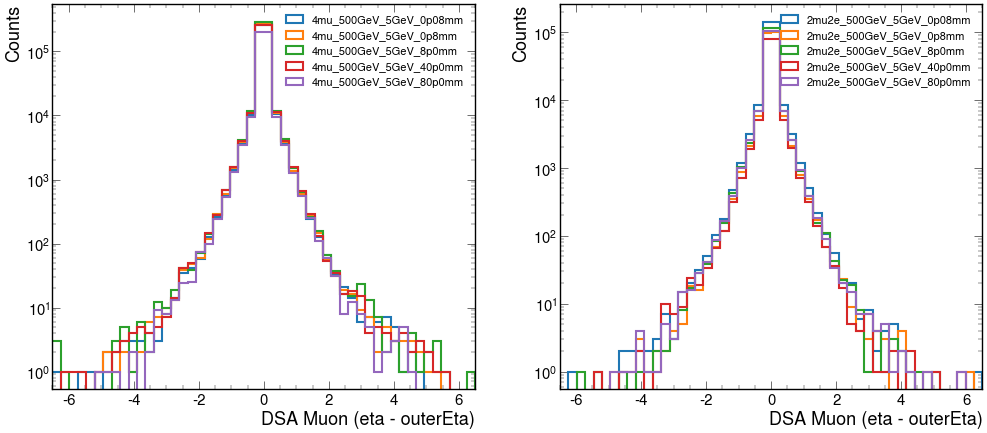

In [10]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("eta - outerEta", events_4mu[i_4mu].eta - events_4mu[i_4mu].outerEta, events_2mu2e[i_2mu].eta - events_2mu2e[i_2mu].outerEta)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].eta - events_4mu[i_4mu].outerEta), range=(-6.5,6.5), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].eta - events_2mu2e[i_2mu].outerEta), range=(-6.5,6.5), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-6.5,6.5)
ax[1].set_xlim(-6.5,6.5)
ax[0].set_xlabel('DSA Muon (eta - outerEta)')
ax[1].set_xlabel('DSA Muon (eta - outerEta)')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/DSA_MUON/Basic/eta-outerEta.png", bbox_inches="tight")

4mu eta - outerEta structure: [[-0.000415, -0.000196, 0.0525], [-0.412, ... [0.552, 0.0162, 0.0646, -0.00666]]
2mu2e eta - outerEta structure: [[0.0123, -0.0407, -0.0473, -0.0829, -0.00973], ... [0.0023, -0.000288, 0.00324]]
4mu eta - outerEta structure: [[-0.00617, 0.00954, -0.000336, 4.8e-06, 0.000565, ... [0.000544, -0.0264, 0.0193]]
2mu2e eta - outerEta structure: [[-0.000432], [-0.0192, 0.352, -0.159, ... 0.0172, 0.0449], [0.00173, 0.00455]]
4mu eta - outerEta structure: [[-0.000376, -0.00308, 0.00859, 0.794, ... -0.000603, 0.0148, -0.00396, 0.00115]]
2mu2e eta - outerEta structure: [[-0.227, 1.9e-05], [0.0233, -7.39e-06, ... 0.1, 0.416, -6.16e-06, 0.00435, -0.0688]]
4mu eta - outerEta structure: [[-0.0102, -0.000959, 0.000506, -0.00398], ... [0.00364, 0.00629, -0.0241]]
2mu2e eta - outerEta structure: [[0.174, -5.14e-05, 0.00963, -0.00042, 0.000265, ... [-0.000153, -0.000177]]
4mu eta - outerEta structure: [[-0.00537, -0.000217, -0.00064], ... [-0.00461, -0.0337, -0.0142, -0.0015

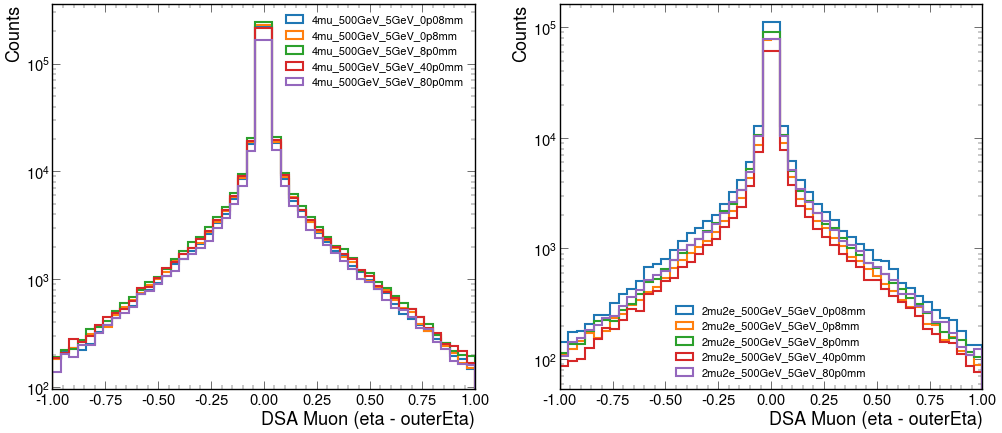

In [5]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("eta - outerEta", events_4mu[i_4mu].eta - events_4mu[i_4mu].outerEta, events_2mu2e[i_2mu].eta - events_2mu2e[i_2mu].outerEta)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].eta - events_4mu[i_4mu].outerEta), range=(-1,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].eta - events_2mu2e[i_2mu].outerEta), range=(-1,1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,1)
ax[1].set_xlim(-1,1)
ax[0].set_xlabel('DSA Muon (eta - outerEta)')
ax[1].set_xlabel('DSA Muon (eta - outerEta)')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/DSA_MUON/Basic/eta-outerEta_low.png", bbox_inches="tight")

## outerPhi

4mu outerPhi structure: [[0.181, -2.98, -2.94], [-2.37, 1.47, -0.645, ... -1.67], [-2.6, -0.984, -1.13, 2]]
2mu2e outerPhi structure: [[2.19, 2.14, 1.41, 2.95, -0.226], [3.09, ... [1.52, 1.37], [-1.63, -1.51, 1.02]]
4mu outerPhi structure: [[-0.791, -2.75, -2.65, 0.515, 0.446], ... -1.25, -1.26], [-0.439, 0.633, 2.75]]
2mu2e outerPhi structure: [[1.28], [0.204, 1.4, 1.04, -0.185], ... 1.37, -0.119, -0.159, 1.81], [2.54, 2.42]]
4mu outerPhi structure: [[-0.735, -0.736, -0.753, 0.808, 1.38, -0.752, ... 2.71, 2.84, 2.83, 0.616, 0.566]]
2mu2e outerPhi structure: [[-2.03, -1.66], [1.55, 1.62], [2.34, ... 1.52], [2.28, 0.766, 2.29, 2.33, 1.75]]
4mu outerPhi structure: [[2.42, -0.472, -0.497, 1.46], [-2.31, ... 1.15, -1.08], [0.739, 0.786, -2.34]]
2mu2e outerPhi structure: [[-0.172, 0.724, -2.03, -1.79, 0.627], [-1.55, ... [2.84, 2.73], [-2.45, -2.5]]
4mu outerPhi structure: [[2.48, -0.86, 2.34], [0.275, -3.11, -2.45, ... 1.87], [-1.84, 1.92, 0.475, -2.89]]
2mu2e outerPhi structure: [[-1.63, 

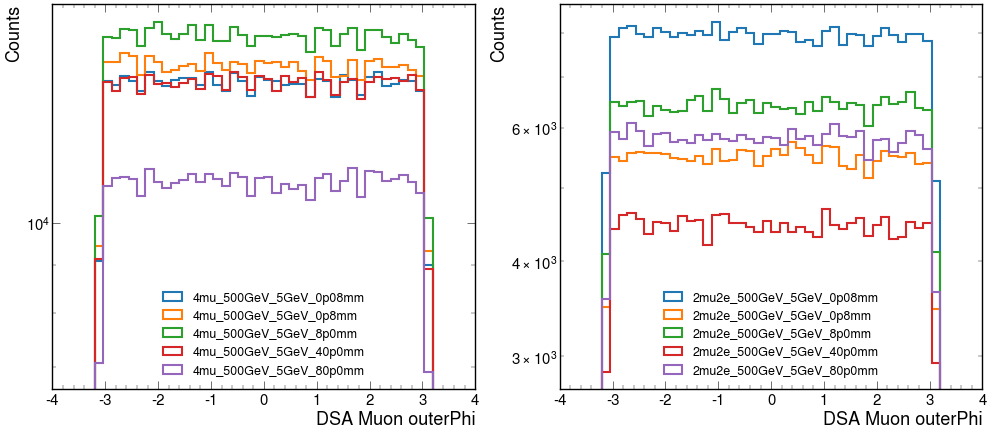

In [13]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("outerPhi", events_4mu[i_4mu].outerPhi, events_2mu2e[i_2mu].outerPhi)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].outerPhi), range=(-4,4), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].outerPhi), range=(-4,4), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

ax[0].set_xlim(-4,4)
ax[1].set_xlim(-4,4)
ax[0].set_xlabel('DSA Muon outerPhi')
ax[1].set_xlabel('DSA Muon outerPhi')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/DSA_MUON/Basic/outerPhi.png", bbox_inches="tight")

## phi - outerPhi

4mu phi - outerPhi structure: [[0.0286, 0.0142, 0.0512], [-0.337, -0.267, ... [-0.282, -0.0369, 0.236, 0.28]]
2mu2e phi - outerPhi structure: [[0.086, 0.116, 0.0663, -5.53, 0.419], ... 0.0125], [0.0375, -0.0108, 0.287]]
4mu phi - outerPhi structure: [[-0.336, 0.114, -0.0232, -0.0323, 0.0454], ... 0.347], [-0.128, 0.373, 0.0659]]
2mu2e phi - outerPhi structure: [[0.0212], [0.247, -0.202, -0.27, 0.514, ... 0.00333, 0.454], [-0.0499, 0.0146]]
4mu phi - outerPhi structure: [[0.0164, 0.0184, -0.0326, -1.44, 0.311, ... -0.00965, 0.013, -0.0631, 0.0315]]
2mu2e phi - outerPhi structure: [[0.456, 0.0155], [-0.36, -0.0275], ... [0.15, -0.109, 0.0286, -0.0255, 0.469]]
4mu phi - outerPhi structure: [[-0.0685, -0.0519, 0.0229, 0.212], [0.301, ... 0.0246], [0.0446, 0.0411, -0.0962]]
2mu2e phi - outerPhi structure: [[0.75, -0.00863, 0.12, -0.298, 0.0259], ... -0.00955, 0.0509], [-0.00708, 0.000588]]
4mu phi - outerPhi structure: [[-0.109, -0.0129, 0.0101], [0.1, 5.98, ... [0.11, -0.00974, 0.385, -0.0

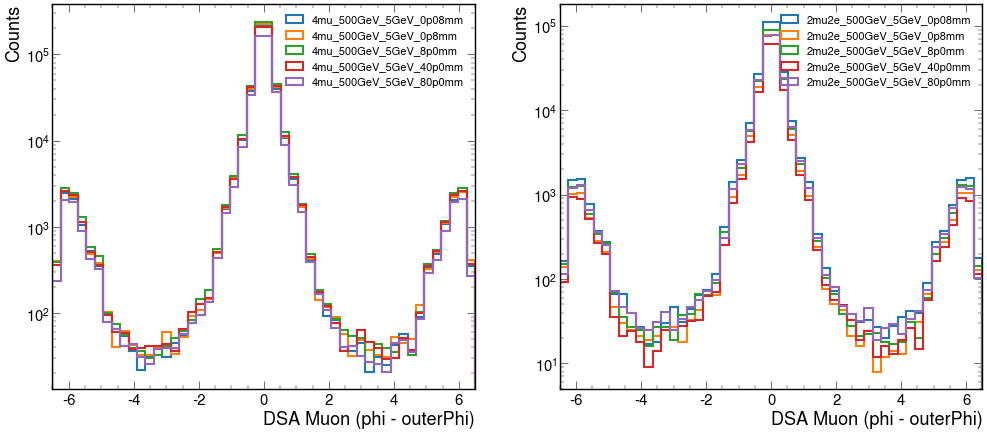

In [44]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("phi - outerPhi", events_4mu[i_4mu].phi - events_4mu[i_4mu].outerPhi, events_2mu2e[i_2mu].phi - events_2mu2e[i_2mu].outerPhi)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].phi - events_4mu[i_4mu].outerPhi), range=(-6.5,6.5), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].phi - events_2mu2e[i_2mu].outerPhi), range=(-6.5,6.5), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

ax[0].set_xlim(-6.5,6.5)
ax[1].set_xlim(-6.5,6.5)
ax[0].set_xlabel('DSA Muon (phi - outerPhi)')
ax[1].set_xlabel('DSA Muon (phi - outerPhi)')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
plt.savefig("../Plots/V2/DSA_MUON/Basic/phi-outerPhi.png", bbox_inches="tight")

4mu phi - outerPhi structure: [[0.0286, 0.0142, 0.0512], [-0.337, -0.267, ... [-0.282, -0.0369, 0.236, 0.28]]
2mu2e phi - outerPhi structure: [[0.086, 0.116, 0.0663, -5.53, 0.419], ... 0.0125], [0.0375, -0.0108, 0.287]]
4mu phi - outerPhi structure: [[-0.336, 0.114, -0.0232, -0.0323, 0.0454], ... 0.347], [-0.128, 0.373, 0.0659]]
2mu2e phi - outerPhi structure: [[0.0212], [0.247, -0.202, -0.27, 0.514, ... 0.00333, 0.454], [-0.0499, 0.0146]]
4mu phi - outerPhi structure: [[0.0164, 0.0184, -0.0326, -1.44, 0.311, ... -0.00965, 0.013, -0.0631, 0.0315]]
2mu2e phi - outerPhi structure: [[0.456, 0.0155], [-0.36, -0.0275], ... [0.15, -0.109, 0.0286, -0.0255, 0.469]]
4mu phi - outerPhi structure: [[-0.0685, -0.0519, 0.0229, 0.212], [0.301, ... 0.0246], [0.0446, 0.0411, -0.0962]]
2mu2e phi - outerPhi structure: [[0.75, -0.00863, 0.12, -0.298, 0.0259], ... -0.00955, 0.0509], [-0.00708, 0.000588]]
4mu phi - outerPhi structure: [[-0.109, -0.0129, 0.0101], [0.1, 5.98, ... [0.11, -0.00974, 0.385, -0.0

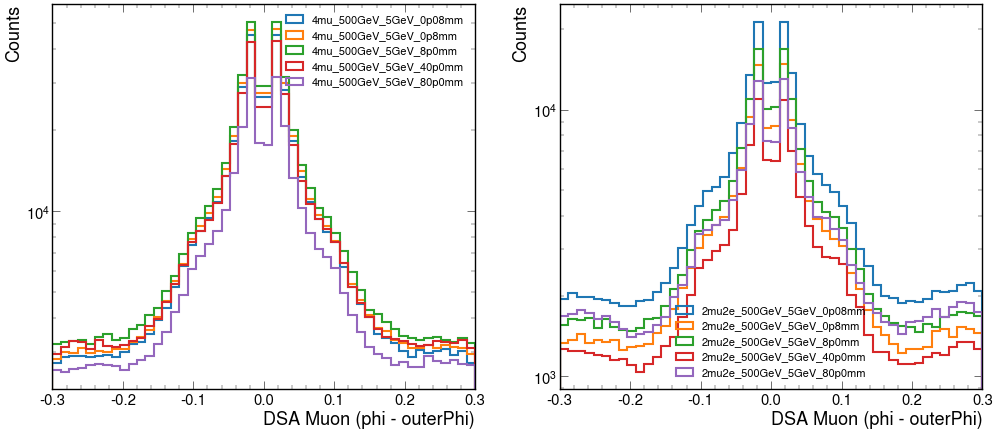

In [47]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("phi - outerPhi", events_4mu[i_4mu].phi - events_4mu[i_4mu].outerPhi, events_2mu2e[i_2mu].phi - events_2mu2e[i_2mu].outerPhi)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].phi - events_4mu[i_4mu].outerPhi), range=(-0.3,0.3), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].phi - events_2mu2e[i_2mu].outerPhi), range=(-0.3,0.3), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

ax[0].set_xlim(-0.3,0.3)
ax[1].set_xlim(-0.3,0.3)
ax[0].set_xlabel('DSA Muon (phi - outerPhi)')
ax[1].set_xlabel('DSA Muon (phi - outerPhi)')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
plt.savefig("../Plots/V2/DSA_MUON/Basic/phi-outerPhi_low.png", bbox_inches="tight")

4mu phi - outerPhi structure: [[0.0286, 0.0142, 0.0512], [-0.337, -0.267, ... [-0.282, -0.0369, 0.236, 0.28]]
2mu2e phi - outerPhi structure: [[0.086, 0.116, 0.0663, -5.53, 0.419], ... 0.0125], [0.0375, -0.0108, 0.287]]
4mu phi - outerPhi structure: [[-0.336, 0.114, -0.0232, -0.0323, 0.0454], ... 0.347], [-0.128, 0.373, 0.0659]]
2mu2e phi - outerPhi structure: [[0.0212], [0.247, -0.202, -0.27, 0.514, ... 0.00333, 0.454], [-0.0499, 0.0146]]
4mu phi - outerPhi structure: [[0.0164, 0.0184, -0.0326, -1.44, 0.311, ... -0.00965, 0.013, -0.0631, 0.0315]]
2mu2e phi - outerPhi structure: [[0.456, 0.0155], [-0.36, -0.0275], ... [0.15, -0.109, 0.0286, -0.0255, 0.469]]
4mu phi - outerPhi structure: [[-0.0685, -0.0519, 0.0229, 0.212], [0.301, ... 0.0246], [0.0446, 0.0411, -0.0962]]
2mu2e phi - outerPhi structure: [[0.75, -0.00863, 0.12, -0.298, 0.0259], ... -0.00955, 0.0509], [-0.00708, 0.000588]]
4mu phi - outerPhi structure: [[-0.109, -0.0129, 0.0101], [0.1, 5.98, ... [0.11, -0.00974, 0.385, -0.0

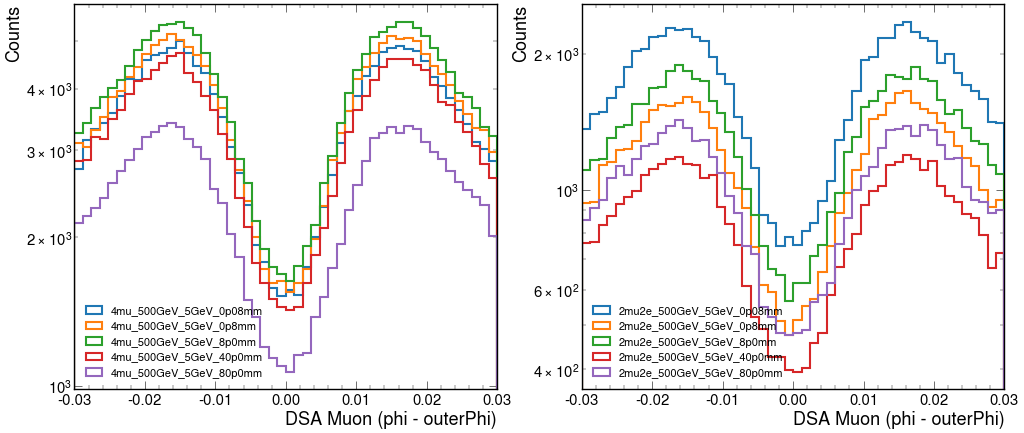

In [6]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("phi - outerPhi", events_4mu[i_4mu].phi - events_4mu[i_4mu].outerPhi, events_2mu2e[i_2mu].phi - events_2mu2e[i_2mu].outerPhi)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].phi - events_4mu[i_4mu].outerPhi), range=(-0.03,0.03), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].phi - events_2mu2e[i_2mu].outerPhi), range=(-0.03,0.03), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

ax[0].set_xlim(-0.03,0.03)
ax[1].set_xlim(-0.03,0.03)
ax[0].set_xlabel('DSA Muon (phi - outerPhi)')
ax[1].set_xlabel('DSA Muon (phi - outerPhi)')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16, loc='lower left')
plt.savefig("../Plots/V2/DSA_MUON/Basic/phi-outerPhi_superlow.png", bbox_inches="tight")